In [1]:
from haplogone import read_vcf, process_vcf_baf, segment_baf, filter_segments_by_size

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.mixture import GaussianMixture

In [2]:
female = read_vcf('../../bioinf_semester_project/data/sample_1.vcf')
male = read_vcf("../../bioinf_semester_project/data/sample_2.vcf")

female_gatk = read_vcf("../../bioinf_semester_project/data/sample_1/gatk_called.vcf")
male_gatk = read_vcf("../../bioinf_semester_project/data/sample_2/gatk_called.vcf")

In [3]:
female = process_vcf_baf(female)
male = process_vcf_baf(male)

female_gatk = process_vcf_baf(female_gatk)
male_gatk = process_vcf_baf(male_gatk)

In [4]:
female = segment_baf(female[female["#CHROM"] == "chr17"], shuffles=5000, p=1e-100)
male = segment_baf(male[male["#CHROM"] == "chr17"], shuffles=5000, p=1e-100)
print(female["BAF_segment"].unique().shape)
print(male["BAF_segment"].unique().shape)

female_gatk = segment_baf(
    female_gatk[female_gatk["#CHROM"] == "chr17"], shuffles=5000, p=1e-100
)
male_gatk = segment_baf(
    male_gatk[male_gatk["#CHROM"] == "chr17"], shuffles=5000, p=1e-100
)
print(female_gatk["BAF_segment"].unique().shape)
print(male_gatk["BAF_segment"].unique().shape)

(113,)
(140,)
(50,)
(45,)


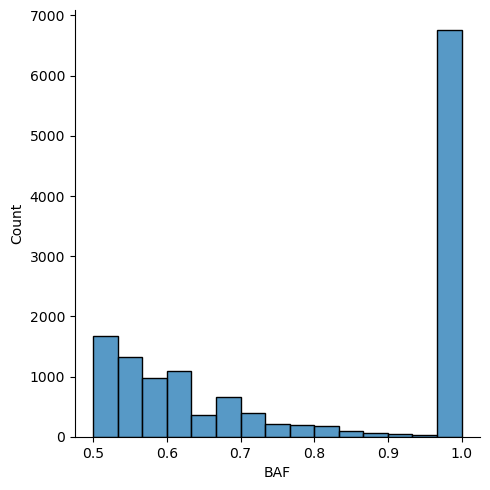

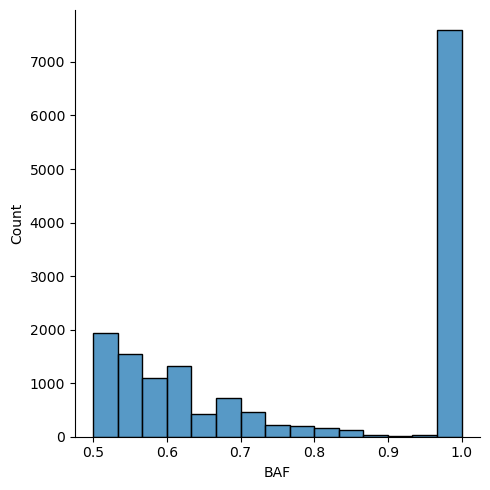

In [5]:
sns.displot(female, x="BAF")
sns.displot(male, x="BAF")

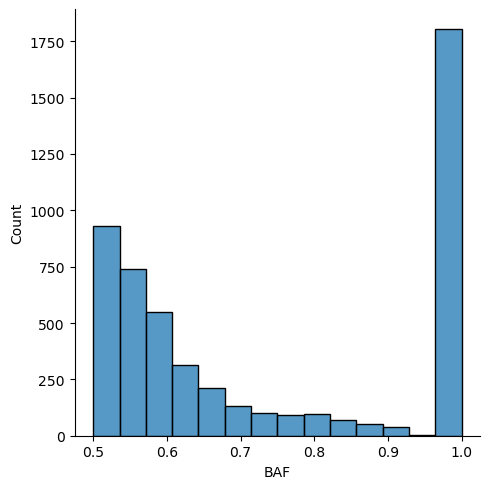

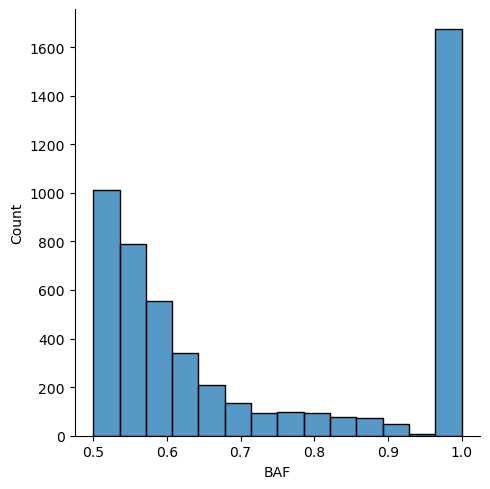

In [6]:
sns.displot(female_gatk, x="BAF")
sns.displot(male_gatk, x="BAF")

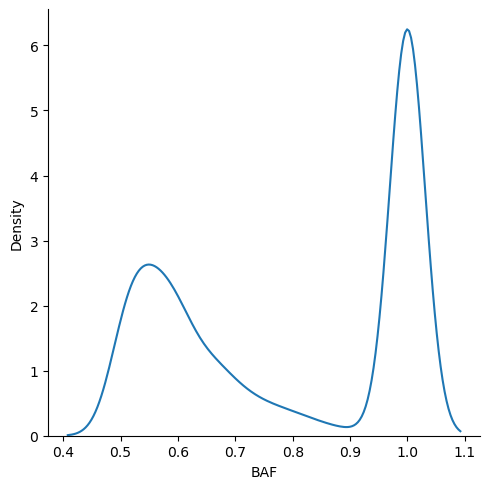

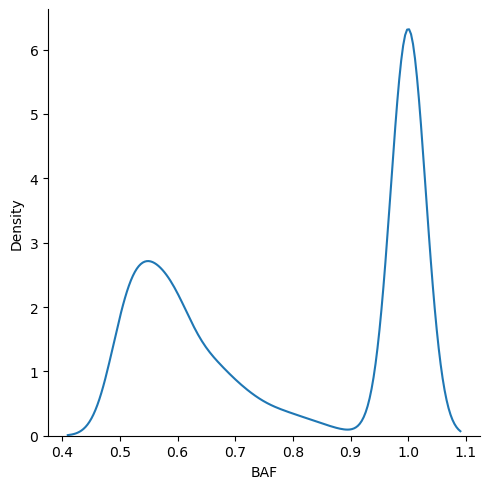

In [7]:
sns.displot(female, x="BAF", kind="kde")
sns.displot(male, x="BAF", kind="kde")

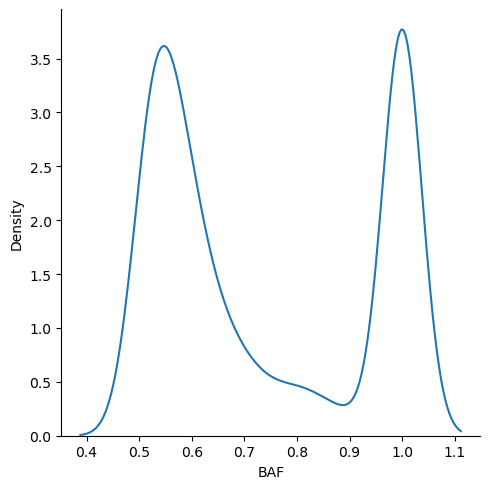

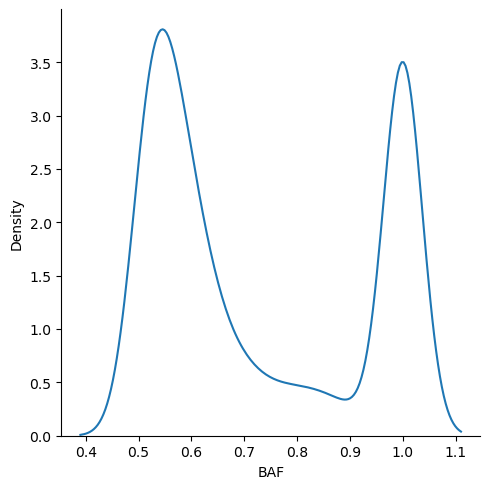

In [8]:
sns.displot(female_gatk, x="BAF", kind="kde")
sns.displot(male_gatk, x="BAF", kind="kde")

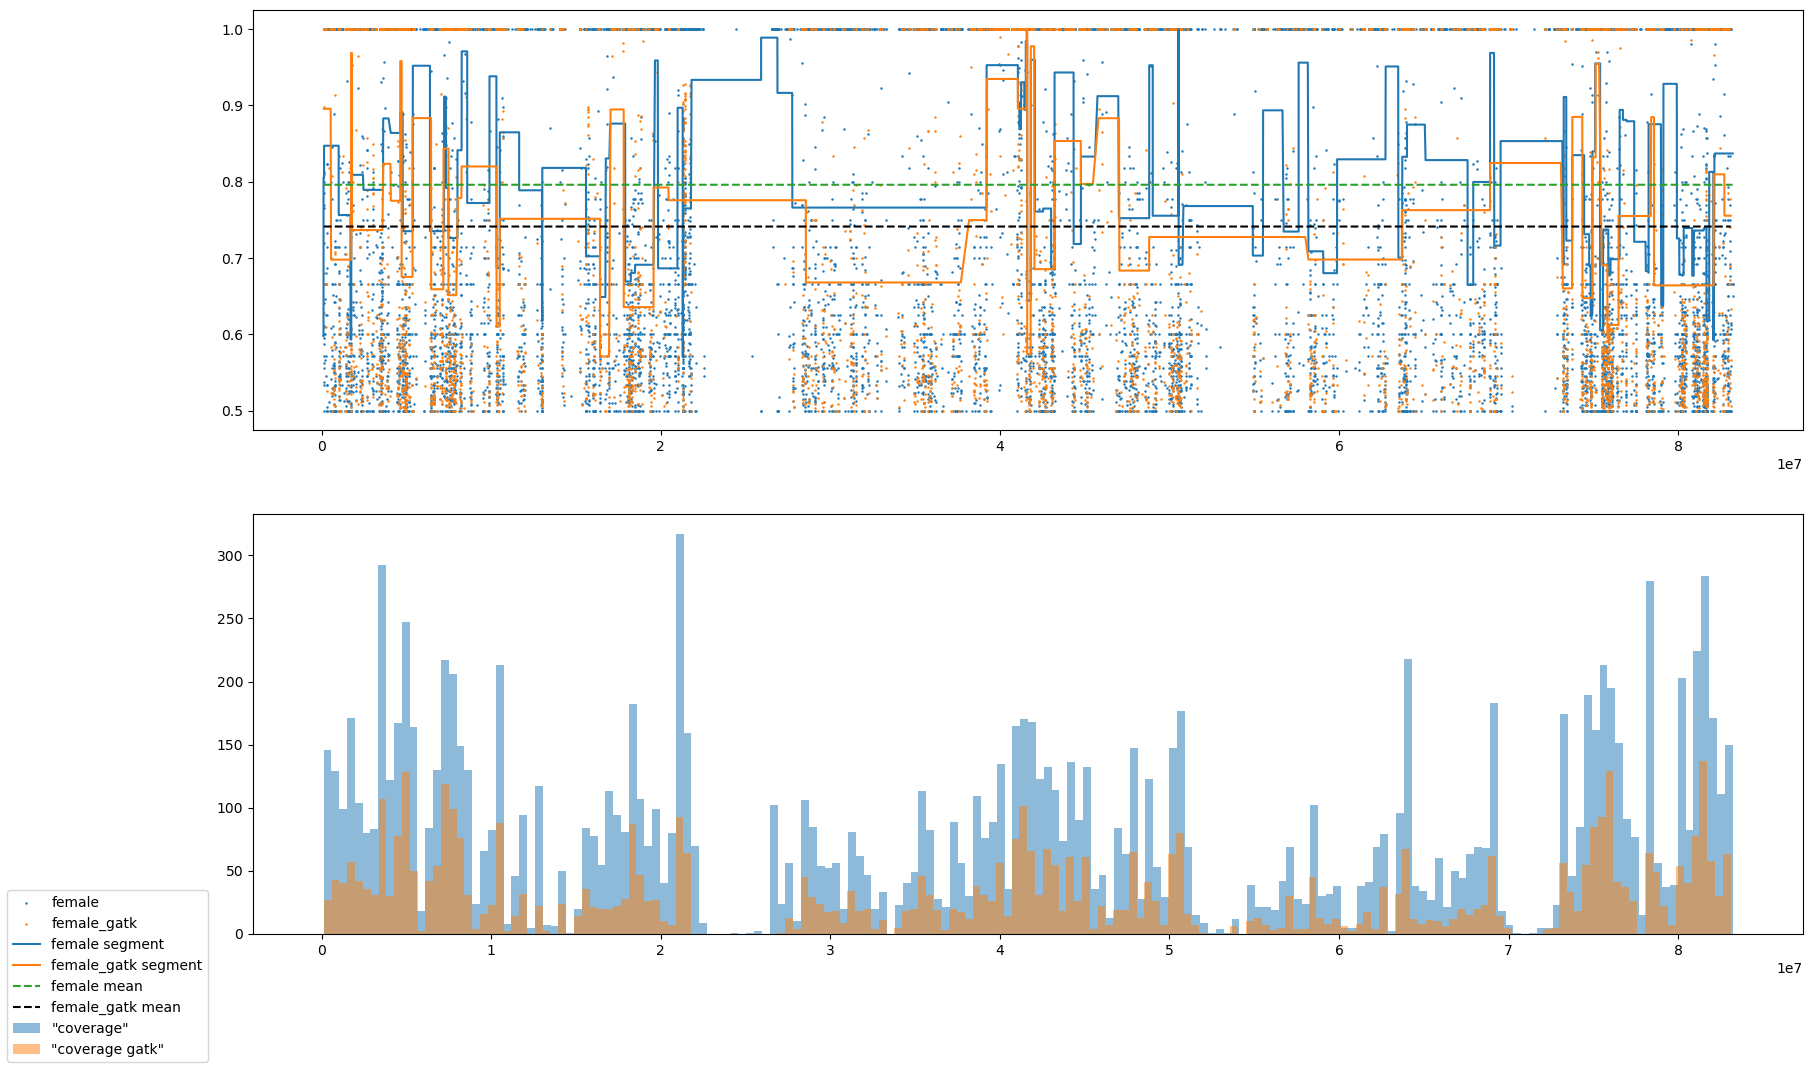

In [9]:
df_vcf, gender = female, "female"

fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(
    df_vcf["POS"],
    df_vcf["BAF"],
    s=0.6,
    #c="b",
    marker="o",
    label=f"{gender}",
)

ax1.scatter(
    female_gatk["POS"],
    female_gatk["BAF"],
    s=0.6,
    #c="b",
    marker="o",
    label=f"female_gatk",
)

ax1.plot(
    df_vcf["POS"],
    df_vcf["BAF_segment"],
    #c="black",
    label=f"{gender} segment",
)

ax1.plot(
    female_gatk["POS"],
    female_gatk["BAF_segment"],
    #c="black",
    label=f"female_gatk segment",
)

ax1.plot(
    df_vcf["POS"],
    np.full(len(df_vcf["POS"]), np.mean(df_vcf["BAF_segment"])),
    #c="black",
    label=f"{gender} mean",
    linestyle="--",
)

ax1.plot(
    female_gatk["POS"],
    np.full(len(female_gatk["POS"]), np.mean(female_gatk["BAF_segment"])),
    c="black",
    label=f"female_gatk mean",
    linestyle="--",
)

ax2.hist(df_vcf["POS"], bins=180, label=f'"coverage"', alpha=0.5)

ax2.hist(female_gatk["POS"], bins=180, label=f'"coverage gatk"', alpha=0.5)


plt.xticks(np.arange(0, max(df_vcf["POS"]), step=1e7))
fig.legend(loc="lower left");

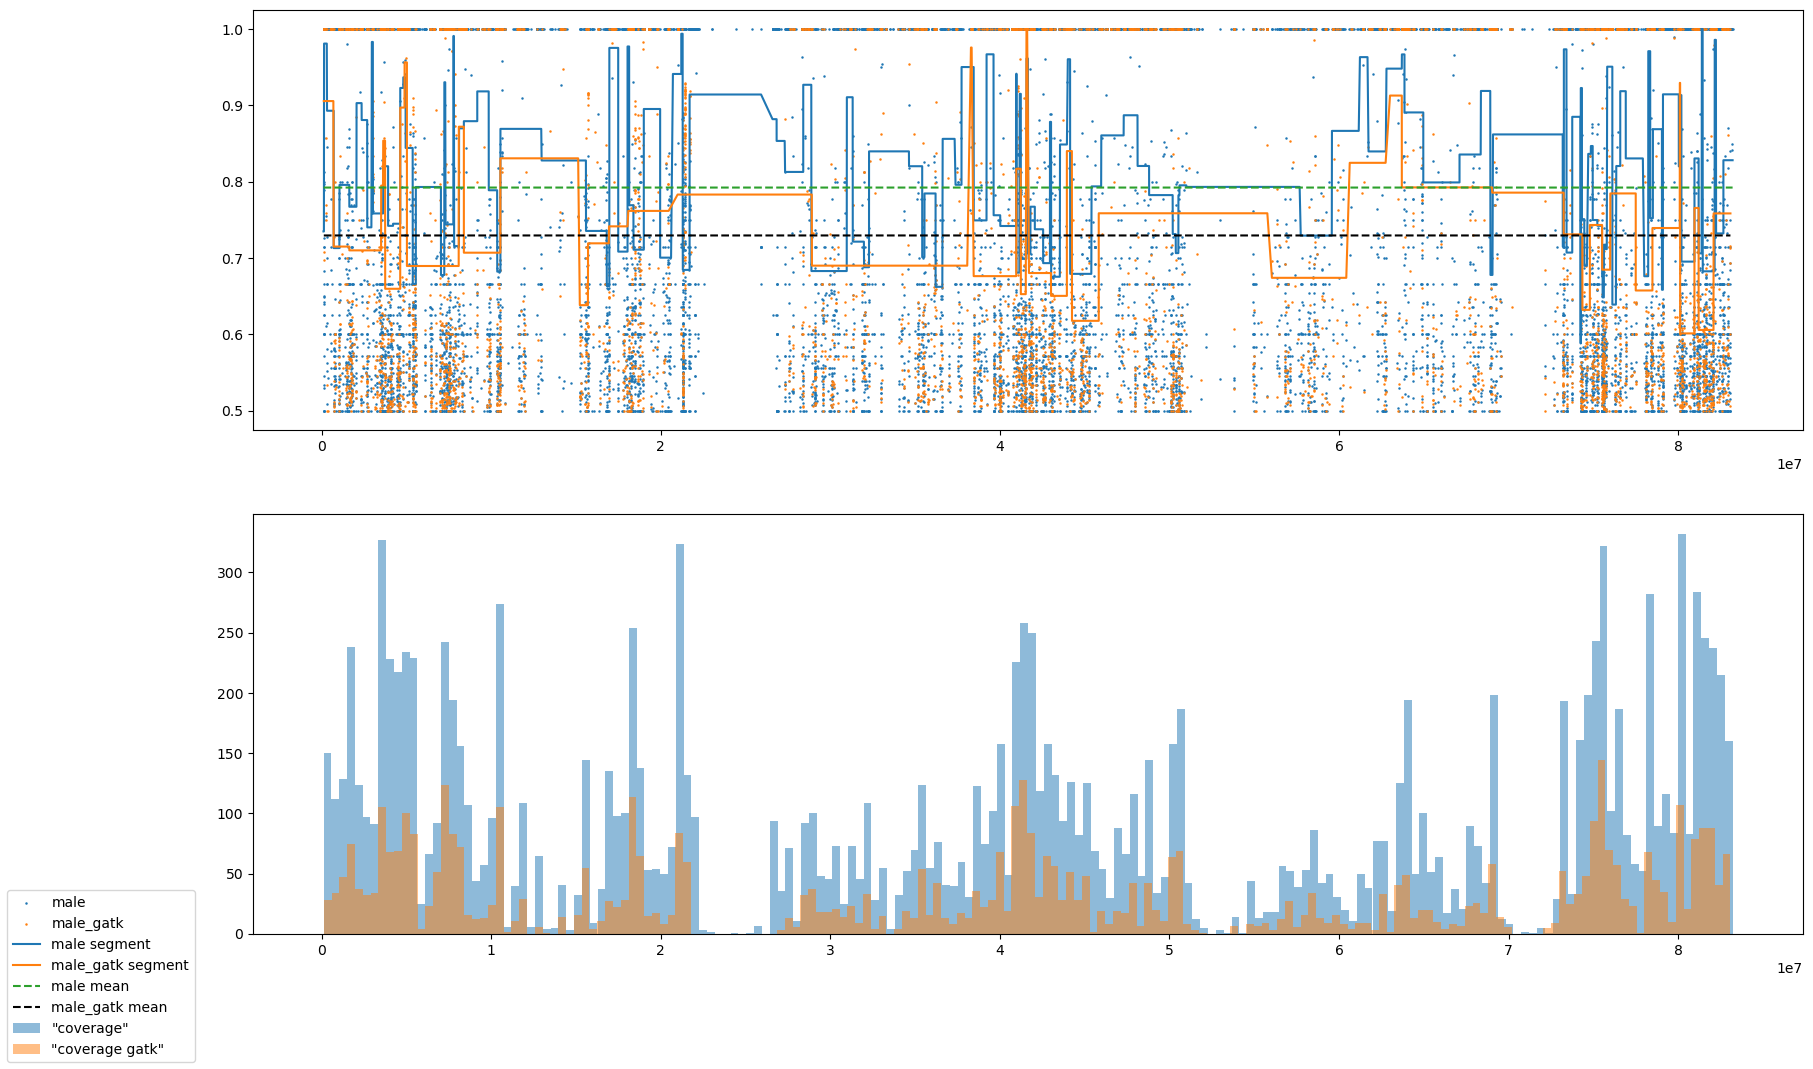

In [10]:
df_vcf, gender = male, "male"

fig = plt.figure(figsize=(20, 12))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.scatter(
    df_vcf["POS"],
    df_vcf["BAF"],
    s=0.6,
    # c="b",
    marker="o",
    label=f"{gender}",
)

ax1.scatter(
    male_gatk["POS"],
    male_gatk["BAF"],
    s=0.6,
    # c="b",
    marker="o",
    label=f"male_gatk",
)

ax1.plot(
    df_vcf["POS"],
    df_vcf["BAF_segment"],
    # c="black",
    label=f"{gender} segment",
)

ax1.plot(
    male_gatk["POS"],
    male_gatk["BAF_segment"],
    # c="black",
    label=f"male_gatk segment",
)

ax1.plot(
    df_vcf["POS"],
    np.full(len(df_vcf["POS"]), np.mean(df_vcf["BAF_segment"])),
    # c="black",
    label=f"{gender} mean",
    linestyle="--",
)

ax1.plot(
    male_gatk["POS"],
    np.full(len(male_gatk["POS"]), np.mean(male_gatk["BAF_segment"])),
    c="black",
    label=f"male_gatk mean",
    linestyle="--",
)

ax2.hist(df_vcf["POS"], bins=180, label=f'"coverage"', alpha=0.5)

ax2.hist(male_gatk["POS"], bins=180, label=f'"coverage gatk"', alpha=0.5)


plt.xticks(np.arange(0, max(df_vcf["POS"]), step=1e7))
fig.legend(loc="lower left")

In [11]:
filter_segments_by_size(male, 0)

,BAF_segment,min,max,segment_length
42,0.734916,116159,139927,23768
134,0.980959,147688,309625,161937
104,0.892997,317581,714860,397279
34,0.713162,714997,1050763,335766
68,0.795909,1055806,1635334,579528
...,...,...,...,...
139,1.000000,81398689,81446410,47721
16,0.682745,81447281,82151473,704192
136,0.985866,82151902,82227312,75410
41,0.732353,82237706,82670178,432472


In [12]:
X = np.array(male["BAF"])
gmm = GaussianMixture(n_components=2).fit(X.reshape(-1, 1))

y = gmm.predict(X.reshape(-1, 1))
print(y.sum())

X = np.array(male["BAF_segment"])
y = gmm.predict(X.reshape(-1, 1))
print(sum(y))

8330
15901


In [13]:
X = np.array(male["BAF"])
gmm = GaussianMixture(n_components=2).fit(X.reshape(-1, 1))

X = np.array(male["BAF_segment"])
male["pred"] = y = gmm.predict(X.reshape(-1, 1))

# X = np.array(female["BAF_segment"])
# y = gmm.predict(X.reshape(-1, 1))
# print(sum(y))

In [14]:
mask_0 = y == 0
mask_1 = y == 1
print(sum(mask_0))
print(sum(mask_1))

12
15901


In [15]:
male["BAF"][0.9 < male["BAF"]].unique()

array([1.        , 0.98101266, 0.91780822, 0.95652174, 0.90566038,
       0.95620438, 0.92857143, 0.95918367, 0.94117647, 0.94594595,
       0.97321429, 0.94736842, 0.93939394, 0.95789474, 0.92      ,
       0.90909091, 0.92682927, 0.93548387, 0.93103448, 0.953125  ,
       0.94285714, 0.96296296, 0.93589744, 0.93877551, 0.95081967,
       0.95384615, 0.91666667, 0.91428571, 0.96078431, 0.94545455,
       0.92592593, 0.91304348, 0.95121951, 0.9375    , 0.95238095,
       0.90728477, 0.9047619 , 0.97402597, 0.93406593, 0.96551724,
       0.95      , 0.98095238, 0.94871795, 0.97222222, 0.98076923,
       0.91025641, 0.93859649, 0.92436975, 0.98947368, 0.93333333,
       0.97333333])

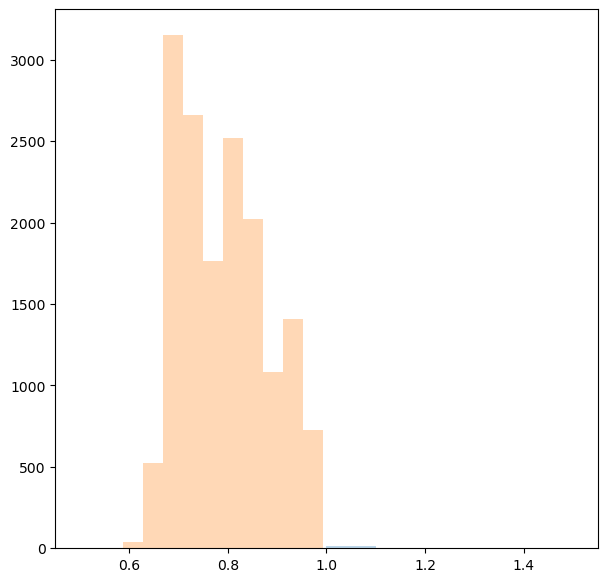

In [16]:
fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(111)

ax1.hist(male["BAF_segment"][male["pred"] == 0], bins=10, label=f"0", alpha=0.3)
ax1.hist(
    male["BAF_segment"][male["pred"] == 1],
    bins=10,
    label=f"1",
    alpha = 0.3

)
plt.show()